In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [27]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [28]:
data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')].copy()
data['rating'] = data['text'].str.extract(r'(\d+(?:\.\d+)?)/10')
data['rating'] = pd.to_numeric(data['rating'])

/var/folders/k6/29nmj8ks6kz11jdpq9m20xk40000gn/T/ipykernel_14352/629127877.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')].copy()


In [29]:
def to_timestamp(x):
    return x.timestamp()

In [30]:
data['timestamp'] = data['created_at'].apply(to_timestamp)
#data['timestamp'] = to_timestamp(data['created_at'])

In [31]:
data

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09


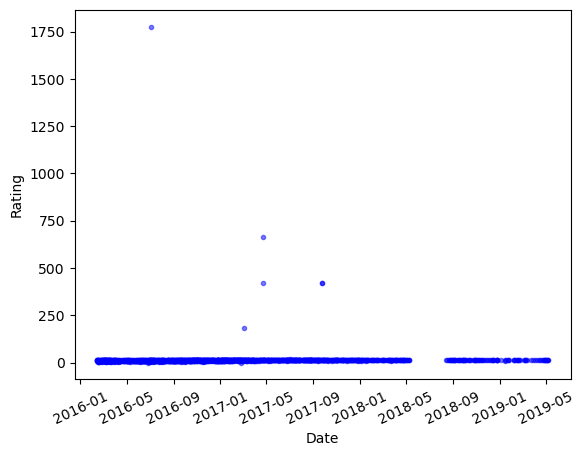

In [32]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

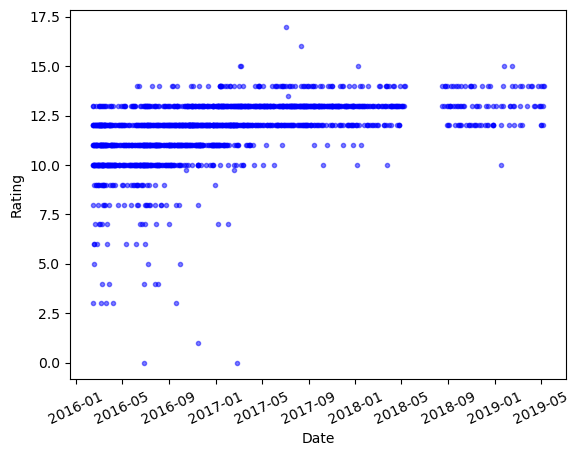

In [33]:
data = data[data['rating']<=25]
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [34]:
fit = scipy.stats.linregress(data.timestamp, data.rating)
fit.slope, fit.intercept

(3.5159299748477226e-08, -40.46415480898918)

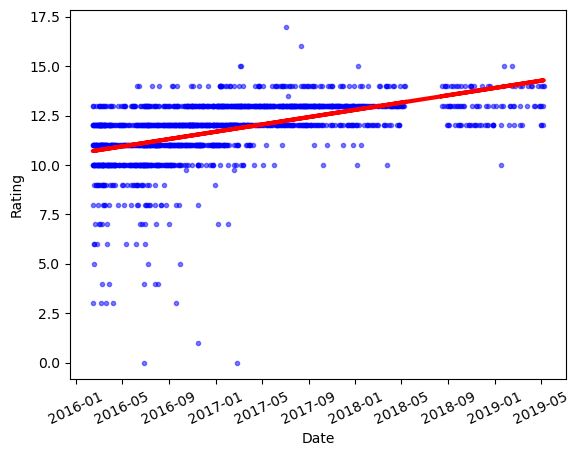

In [35]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [36]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
data

/var/folders/k6/29nmj8ks6kz11jdpq9m20xk40000gn/T/ipykernel_14352/1972823382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prediction'] = data['timestamp']*fit.slope + fit.intercept


,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540
